In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from random import randint
k = randint(1,100)

In [2]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
quest_data = data.data[:,:2]
quest_data

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [5]:
reg = LogisticRegression()

In [6]:
features_train, features_test, labels_train, labels_test = train_test_split(quest_data, data.target, random_state=k)
features_train

array([[ 9.667, 18.49 ],
       [11.52 , 18.75 ],
       [13.71 , 18.68 ],
       [14.19 , 23.81 ],
       [12.68 , 23.84 ],
       [12.78 , 16.49 ],
       [11.94 , 20.76 ],
       [13.85 , 15.18 ],
       [16.13 , 17.88 ],
       [14.47 , 24.99 ],
       [11.87 , 21.54 ],
       [19.17 , 24.8  ],
       [10.88 , 15.62 ],
       [13.87 , 20.7  ],
       [13.62 , 23.23 ],
       [11.27 , 15.5  ],
       [13.64 , 15.6  ],
       [11.74 , 14.69 ],
       [19.53 , 18.9  ],
       [10.26 , 14.71 ],
       [12.46 , 12.83 ],
       [13.11 , 15.56 ],
       [20.09 , 23.86 ],
       [17.19 , 22.07 ],
       [19.45 , 19.33 ],
       [13.61 , 24.69 ],
       [14.42 , 16.54 ],
       [10.48 , 14.98 ],
       [17.6  , 23.33 ],
       [14.58 , 13.66 ],
       [ 8.734, 16.84 ],
       [14.44 , 15.18 ],
       [12.4  , 17.68 ],
       [11.08 , 18.83 ],
       [ 8.618, 11.79 ],
       [15.34 , 14.26 ],
       [11.28 , 13.39 ],
       [11.34 , 18.61 ],
       [11.71 , 17.19 ],
       [11.81 , 17.39 ],


In [7]:
reg.fit(features_train, labels_train)

C:\Users\rin46\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
labels_score = reg.decision_function(features_test)

In [10]:
roc_auc = roc_auc_score(labels_test, labels_score)

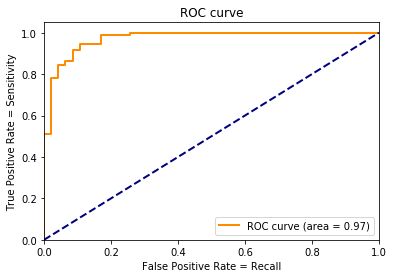

In [11]:
fpr, tpr, thresholds = roc_curve(labels_test, labels_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.svm import SVC


In [13]:
svc_clf = SVC(C=1000, kernel='linear', gamma='auto')
svc_clf.fit(features_train, labels_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
labels_score = reg.decision_function(features_test)

In [15]:
svc_roc_auc = roc_auc_score(labels_test, labels_score)

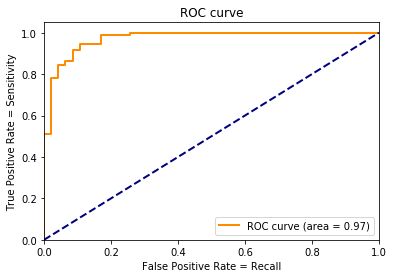

In [16]:
fpr, tpr, thresholds = roc_curve(labels_test, labels_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
param_grid = {'C':[0.1, 1, 10, 100, 1000, 10000], 'kernel':['linear', 'rbf']}

In [20]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svc_clf, param_grid, cv=5) # 보통 교차검증을 사용한 그리드 서치를 시행!
# GridSearchCV(모델, 파라미터 딕셔너리)
grid_search.fit(features_train, labels_train)

print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

최적의 파라미터:  {'C': 10000, 'kernel': 'linear'}
최고 성능 모델:  SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
최고 교차검증 점수: 0.89


In [ ]:
#### 최고 교차검증 점수 0.89 ####